In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = randn(25)

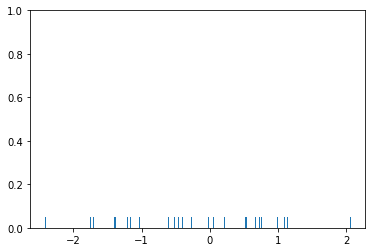

In [3]:
sns.rugplot(dataset)

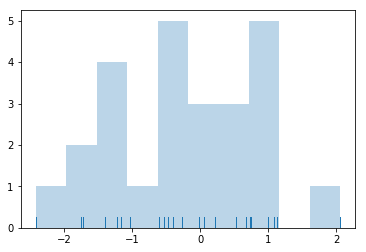

In [6]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0.1, 0.42000000000000004)

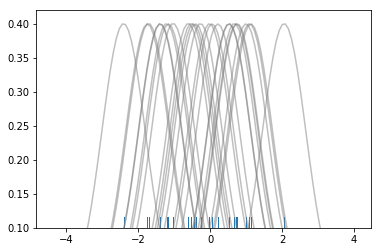

In [9]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() +2
x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list = []
for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis, kernel, color = 'gray', alpha=0.5)
plt.ylim(0.1)

Text(0.5,0.98,'Sum of the Basis Function')

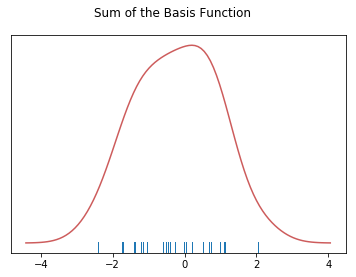

In [12]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('Sum of the Basis Function')

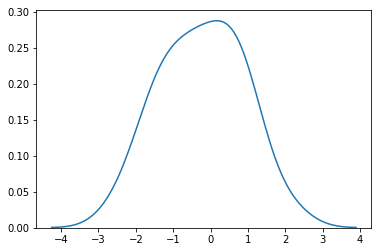

In [13]:
sns.kdeplot(dataset)

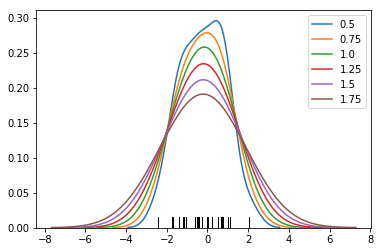

In [14]:
sns.rugplot(dataset, color='black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset, bw=bw, label=bw)

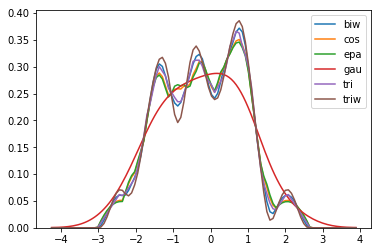

In [15]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']
for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern)

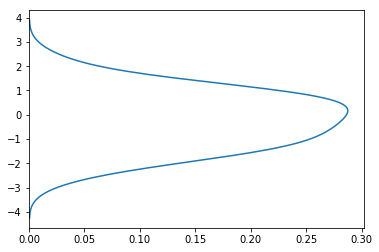

In [16]:
sns.kdeplot(dataset, vertical=True)

(array([ 1.,  3.,  7.,  8., 13., 16., 19., 24., 24., 25.]),
 array([-2.41183831, -1.96520767, -1.51857704, -1.07194641, -0.62531578,
        -0.17868515,  0.26794549,  0.71457612,  1.16120675,  1.60783738,
         2.05446802]),
 <a list of 10 Patch objects>)

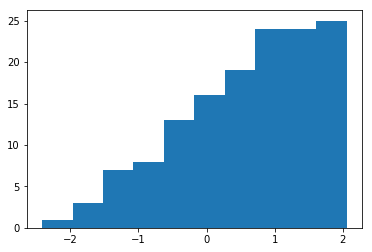

In [17]:
plt.hist(dataset, cumulative=True)

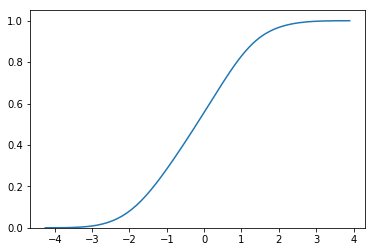

In [18]:
sns.kdeplot(dataset, cumulative=True)

In [19]:
mean = [0,0]
cov =[[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean, cov, 1000)

In [21]:
dataset2

array([[ 0.1039233 , 17.23198043],
       [ 2.04925172, 11.03417787],
       [-0.99920676, -4.26121846],
       ...,
       [-0.54496187, 12.25862491],
       [ 0.57631949,  1.12658438],
       [-0.78299771,  1.76442367]])

/Users/yamaguchishota/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


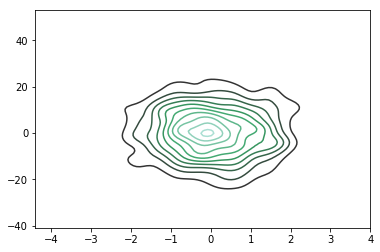

In [20]:
dframe = pd.DataFrame(dataset2, columns=['X','Y'])
sns.kdeplot(dframe)

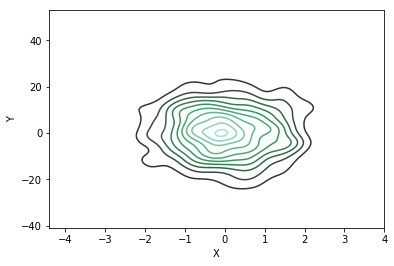

In [22]:
sns.kdeplot(dframe.X, dframe.Y)

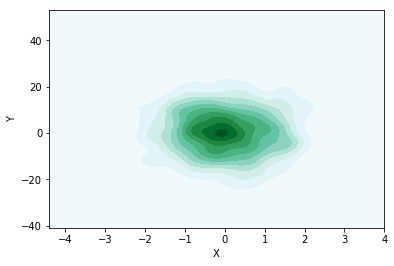

In [23]:
sns.kdeplot(dframe.X, dframe.Y, shade=True)

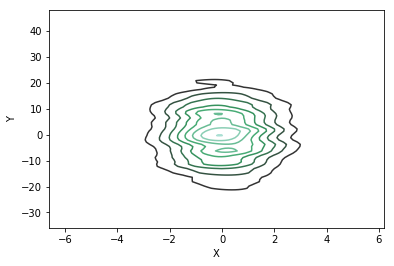

In [24]:
sns.kdeplot(dframe.X, dframe.Y, bw=1)

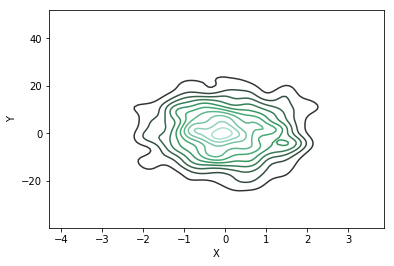

In [25]:
sns.kdeplot(dframe.X, dframe.Y, bw='silverman')

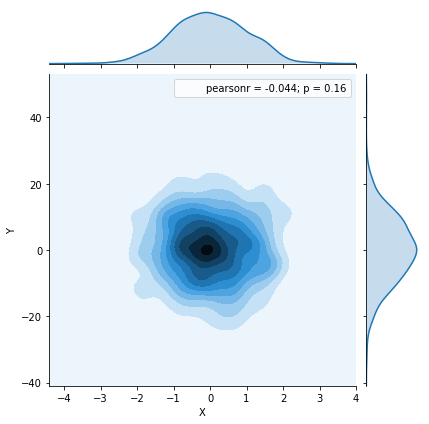

In [26]:
sns.jointplot('X','Y', dframe, kind='kde')